# Yelp Data (Initial Exploration)

Import the python scientific suite

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
import seaborn as sns
import scipy

# This is importing a "future" python version 3 print function.
from __future__ import print_function
from __future__ import division
%matplotlib inline
sns.set()
sns.set_context('paper', font_scale = 1.5)
sns.set_style('ticks')

/Users/Franklin/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
file_dir = '/Volumes/1TB_BAY/yelp_dataset_challenge_academic_dataset/'

In [3]:
ls /Volumes/1TB_BAY/yelp_dataset_challenge_academic_dataset/

Dataset_Challenge_Academic_Dataset_Agreement.pdf
Yelp_Dataset_Challenge_Terms_round_7.pdf
json_to_csv_converter.py*
yelp_academic_dataset_business.csv
yelp_academic_dataset_business.json
yelp_academic_dataset_checkin.json
yelp_academic_dataset_review.csv
yelp_academic_dataset_review.json
yelp_academic_dataset_review_top100.csv
yelp_academic_dataset_review_top100_clean.csv
yelp_academic_dataset_review_top30.csv
yelp_academic_dataset_review_top40.csv
yelp_academic_dataset_tip.json
yelp_academic_dataset_user.json


In [4]:
b = pd.read_csv(file_dir + 'yelp_academic_dataset_business.csv') #b for business

/Users/Franklin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,4,7,17,29,49,60,62,79,86,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
la['name']

2215                 Comfort Inn Denver Southeast Area
2216                                    Domino's Pizza
2217                            Viad Tower Restaurants
2218                                        Sky Lounge
2219                                           Palazzo
2220          Law Offices of Roger K. Spencer, P.L.L.C
2221                             Virginia Auto Service
2222                                      Wild Thaiger
2223                                    V's Barbershop
2224                 Central Park Square Athletic Club
2225                            Central Phoenix OB/Gyn
2226                          Renaissance Fine Jewelry
2227             Terrace Cafe At Hyatt Regency Phoenix
2228                  Best Western Central Phoenix Inn
2229                                           Safeway
2230                                       Canyon Cafe
2231                             Teeter House Tea Room
2232                                DeChance & Company
2233      

In [63]:
name, counts = np.unique(b['name'], return_counts = True)
counts_df = pd.DataFrame(data = {'name': name, 'counts':counts})
counts_df.sort_values(by = 'counts', ascending = False).head(100).to_csv('top100_chains.csv')
print(counts_df.sort_values(by = 'counts', ascending = False).head(20).to_latex())

\begin{tabular}{lrl}
\toprule
{} &  counts &                    name \\
\midrule
47285 &     483 &               Starbucks \\
47872 &     365 &                  Subway \\
32246 &     345 &              McDonald's \\
55814 &     200 &               Walgreens \\
49034 &     180 &               Taco Bell \\
39054 &     155 &               Pizza Hut \\
8561  &     147 &             Burger King \\
56135 &     144 &                 Wendy's \\
52181 &     134 &           The UPS Store \\
37041 &     120 &           Panda Express \\
16257 &     119 &          Dunkin' Donuts \\
5291  &     118 &         Bank of America \\
21597 &     114 &             Great Clips \\
56127 &     108 &        Wells Fargo Bank \\
11833 &     107 &                Circle K \\
15746 &      97 &          Domino's Pizza \\
11495 &      95 &  Chipotle Mexican Grill \\
25862 &      95 &            Jimmy John's \\
26500 &      93 &                     KFC \\
54057 &      88 &          US Post Office \\
\bottomrule
\end{ta

In [62]:
import ast
categories = [ast.literal_eval(i) for i in b['categories']] #convert the categories string to a list of lists
flat_categories = [item for sublist in categories for item in sublist] #flatten this list so the most common categories can be explored
categ_df = pd.DataFrame(data = {'category': np.unique(flat_categories, return_counts = True)[0],\
                                'counts': np.unique(flat_categories, return_counts = True)[1]})
categ_df.sort_values(by = 'counts', ascending = False).head(100).to_csv('top100_categories.csv')
print(categ_df.sort_values(by = 'counts', ascending = False).head(20).to_latex())

\begin{tabular}{llr}
\toprule
{} &                   category &  counts \\
\midrule
701 &                Restaurants &   25071 \\
735 &                   Shopping &   11233 \\
326 &                       Food &    9250 \\
79  &              Beauty \& Spas &    6583 \\
386 &           Health \& Medical &    5121 \\
553 &                  Nightlife &    5088 \\
407 &              Home Services &    4785 \\
70  &                       Bars &    4328 \\
57  &                 Automotive &    4208 \\
491 &             Local Services &    3468 \\
3   &                Active Life &    3103 \\
299 &                    Fashion &    3078 \\
289 &  Event Planning \& Services &    2975 \\
300 &                  Fast Food &    2851 \\
631 &                      Pizza &    2657 \\
521 &                    Mexican &    2515 \\
424 &            Hotels \& Travel &    2495 \\
19  &     American (Traditional) &    2416 \\
712 &                 Sandwiches &    2364 \\
43  &       Arts \& Entertainment &   

In [8]:
import csv
from textstat.textstat import textstat
import pattern.en as en

In [28]:
def ReadJson(myfile){}
    # read the entire file into a python array
    with open(myfile, 'rb') as f:
        data = f.readlines()

    # remove the trailing "\n" from each line
    data = map(lambda x: x.rstrip(), data)

    # each element of 'data' is an individual JSON object.
    # i want to convert it into an *array* of JSON objects
    # which, in and of itself, is one large JSON object
    # basically... add square brackets to the beginning
    # and end, and have all the individual business JSON objects
    # separated by a comma
    data_json_str = "[" + ','.join(data) + "]"

    # now, load it into pandas
    data_df = pd.read_json(data_json_str)
    
    return data_df

SyntaxError: invalid syntax (<ipython-input-28-2e9d324a193c>, line 1)

In [26]:
r = ReadJson('')

ValueError: Trailing data

In [14]:
r = pd.read_csv(file_dir + 'yelp_academic_dataset_review_top40.csv', quoting = csv.QUOTE_NONE, sep = ',',error_bad_lines = False) #r for review

In [19]:
r = pd.read_csv(file_dir + 'yelp_academic_dataset_review_top30.csv')

In [64]:
pd.read_json(file_dir + 'yelp_academic_dataset_review.json')

ValueError: Trailing data

In [28]:
print(textstat.flesch_reading_ease(r['text'][0]))
print(textstat.flesch_kincaid_grade(r['text'][0]))

72.16
7.2


In [49]:
def ReviewMetrics(r):
    fk_re = []
    fk_gr = []
    
    for rev in r['text']:
        fk_re.append(textstat.flesch_reading_ease(rev)) #reading ease
        fk_gr.append(textstat.flesch_kincaid_grade(rev)) #grade reading level
    
    return pd.DataFrame(data = [fk_re, fk_gr]).T

In [50]:
ReviewMetrics(r)

,0,1
0,72.16,7.2
1,68.77,6.4
2,84.68,4.4
3,90.77,2.1
4,79.60,6.4
5,84.68,4.4
6,96.18,2.1
7,70.80,5.6
8,87.05,5.6
9,74.19,6.4


In [65]:
# import modules
import json
import glob

# read in yelp data
yelp_files = file_dir + "yelp_academic_dataset_review.json"
yelp_data = []
with open(yelp_files) as f:
    for line in f:
        yelp_data.append(json.loads(line))
        
r = pd.DataFrame(yelp_data) #successful readin of part of the DF.

KeyboardInterrupt: 

In [79]:
from astropy.time import Time

t_column = []
for t in r['date']: #for each time
    t_column.append(Time(t).jd) #convert the time to jd and add it to a new column

KeyboardInterrupt: 

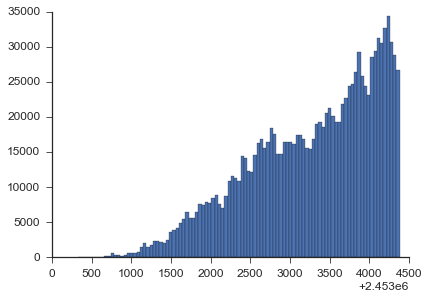

In [87]:
plt.hist(t_column, bins = 100)
sns.despine()